
# Ayudantía 9 — Práctica de EDA
**IMT2200 - Introducción a la Ciencia de Datos**  

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import unicodedata

## 📘 Descripción general de las columnas

El dataset **“Vulnerabilidad de los Locales Escolares ante la ocurrencia de Deslizamientos y/o Inundaciones”** contiene información detallada de instituciones educativas del Perú, recopilada por el MINEDU y otras entidades técnicas. [Link](https://www.kaggle.com/datasets/johnlopezvega/base-de-datos-de-vulnerabilidad-ante-el-fen)
 
Cada fila representa un **local escolar** con atributos administrativos, geográficos e indicadores de riesgo físico y estructural.  
A continuación, se describen los principales grupos de variables:

---

### 🏫 **Identificación y gestión**
- **Código modular:** identificador único del local escolar.  
- **Nombre del Centro Educativo:** denominación oficial del establecimiento.  
- **Tipo de Gestión:** indica si el centro es público o privado.  
- **Gestión:** especifica la entidad administradora (por ejemplo, “Sector Educación”, “Comunidad religiosa”).  

---

### 🌎 **Ubicación**
- **Región / Provincia / Distrito:** ubican geográficamente cada local escolar dentro de la división política peruana.  
- **Localidad / Centro poblado:** detalle adicional del asentamiento o zona donde se ubica el local.  
- **Ubigeo:** código estándar que identifica la ubicación geográfica.  
- **Latitud / Longitud:** coordenadas aproximadas del local, útiles para análisis espacial o mapas.

---

### 👩‍🏫 **Capacidad educativa**
- **Alumnos hombres / Alumnos mujeres / Total alumnos:** matrícula desagregada por sexo y total de estudiantes.  
- **Total Docentes / Total Secciones:** tamaño del plantel docente y número de aulas o divisiones educativas.  

---

### 🏗️ **Infraestructura**
- **% Aulas para sustituir - CIE - BM -:** porcentaje de aulas que requieren reemplazo.  
- **Infraestructura: Nivel I / II / III:** clasificación del estado físico del local (Nivel I = muy mala, Nivel III = regular o buena).  

---

### ⚠️ **Riesgos y vulnerabilidad**
- **Riesgo de Deslizamiento (5 muy alto) - INGEMMET -:** grado de amenaza por deslizamientos.  
- **Riesgo de Inundación (1 sí) - MINAM - ANA -:** indica si el local está en zona inundable.  
- **Movimiento de Masas / Inundación 1:100,000:** intensidad del riesgo geológico o hídrico.  
- **CATEGORÍA / CATEGORÍA FINAL (con respuesta de UGEL):** nivel general de vulnerabilidad del local escolar frente al Fenómeno del Niño (de “Muy Bajo” a “Muy Alto”).  
- **Categoría + UGEL + Quebrada:** clasificación combinada final (usada como variable síntesis de vulnerabilidad).

---

### 💡 **Uso en el EDA**
- En el **análisis univariado** se examinan distribuciones de variables categóricas y ordinales como `CATEGORÍA FINAL`, `Infraestructura: Nivel III`, `Tipo de Gestión`.  
- En el **bivariado**, se estudian relaciones entre `CATEGORÍA FINAL` y factores como `Región`, `Tipo de Gestión`, `Infraestructura`.  
- En el **multivariado**, se construye un **índice simple de vulnerabilidad** combinando variables ordinales de riesgo e infraestructura.

---

## 0. Carga del dataset y saneo de encabezados

In [2]:
path = "Vulnerabilidad_ante_FEN.csv"
df_raw = pd.read_csv(path, sep=";", encoding="latin-1")
df_raw.head(3)

C:\Users\djop4\AppData\Local\Temp\ipykernel_284\3821238445.py:2: DtypeWarning: Columns (0,1,2,3,12,13,14,17,20,24,26,30,31,32,35,36,37,38,39,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(path, sep=";", encoding="latin-1")


,Vulnerabilidad de los Locales Escolares ante la ocurrencia de Deslizamientos y/o Inundaciones originados por lluvias anómalas causadas por el Fenómeno El Niño,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,Identificación - Escale Feb 2016 -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RESUMEN: VULNERABILIDAD FRENTE AL FEN,NaN,NaN,NaN
1,Código modular,Anexo,Código de Local,Cantidad de IIEE que comparten el mismo local ...,Nombre del Centro Educativo,Código modalidad,Modalidad,Forma,Característica,Sexo,...,"Movimiento de Masas 1:100,000 (5 Muy alta) - I...","Inundación 1:100,000 (5 Muy alta) - INGEMMET -",% Aulas para sustituir - CIE - BM -,Infraestructura: Nivel I (muy mala) - CIE -,Infraestructura: Nivel II (mala) - CIE -,Infraestructura: Nivel III (regular o buena) -...,CATEGORÍA,CATEGORÍA FINAL (con respuesta de UGEL),1incremento por ugel,Categoría + UGEL + Quebrada
2,415547,0,16100,1,123,A2,Inicial - Jardín,Escolarizada,No aplica,Mixto,...,1,4,NaN,0,0,1,3. Medio,3. Medio,NaN,3. Medio


In [3]:
raw = pd.read_csv(path, sep=";", encoding="latin-1", header=None, engine="python", dtype=str)
df = raw.iloc[3:].reset_index(drop=True).copy()
df.columns = raw.iloc[2].fillna("").astype(str).str.strip().replace("\n"," ", regex=False)


print("Dimensiones originales:", df.shape)

df.head()

Dimensiones originales: (151548, 64)


2,Código modular,Anexo,Código de Local,Cantidad de IIEE que comparten el mismo local escolar,Nombre del Centro Educativo,Código modalidad,Modalidad,Forma,Característica,Sexo,...,"Movimiento de Masas 1:100,000 (5 Muy alta) - INGEMMET -","Inundación 1:100,000 (5 Muy alta) - INGEMMET -",% Aulas para sustituir - CIE - BM -,Infraestructura: Nivel I (muy mala) - CIE -,Infraestructura: Nivel II (mala) - CIE -,Infraestructura: Nivel III (regular o buena) - CIE -,CATEGORÍA,CATEGORÍA FINAL (con respuesta de UGEL),1incremento por ugel,Categoría + UGEL + Quebrada
0,415547,0,16100,1,123,A2,Inicial - Jardín,Escolarizada,No aplica,Mixto,...,1,4,NaN,0,0,1,3. Medio,3. Medio,NaN,3. Medio
1,415638,0,15172,1,122,A2,Inicial - Jardín,Escolarizada,No aplica,Mixto,...,1,4,13%,0,1,0,3. Medio,3. Medio,NaN,3. Medio
2,415646,0,15186,1,233,A2,Inicial - Jardín,Escolarizada,No aplica,Mixto,...,1,4,60%,1,0,0,3. Medio,3. Medio,NaN,3. Medio
3,415877,0,16751,3,COLEGIO PARROQUIAL NUESTRA SEÃORA DEL SAGRADO...,A2,Inicial - Jardín,Escolarizada,No aplica,Mixto,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,567206,0,16119,1,268,A2,Inicial - Jardín,Escolarizada,No aplica,Mixto,...,3,2,NaN,0,1,0,3. Medio,3. Medio,NaN,3. Medio


In [4]:
# Elimina el nombre asociado al eje de columnas
df.columns.name = None
# (opcional) también limpia el índice por si acaso
df.index.name = None

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151548 entries, 0 to 151547
Data columns (total 64 columns):
 #   Column                                                   Non-Null Count   Dtype 
---  ------                                                   --------------   ----- 
 0   Código modular                                           151548 non-null  object
 1   Anexo                                                    151548 non-null  object
 2   Código de Local                                          113844 non-null  object
 3   Cantidad de IIEE que comparten el mismo local escolar    151548 non-null  object
 4   Nombre del Centro Educativo                              151548 non-null  object
 5   Código modalidad                                         151548 non-null  object
 6   Modalidad                                                151548 non-null  object
 7   Forma                                                    151548 non-null  object
 8   Característica          

## 1. Limpieza

- Cargar el dataset y mostrar dimensiones.  
- Identificar columnas relevantes (`Región`, `Tipo de Gestión`, `CATEGORÍA FINAL`, `Infraestructura`, `Riesgo de Deslizamiento`, etc.).  
- Quitar nulos, duplicados y normalizar tipos.

**Pregunta práctica:**  
> ¿Cuántos locales hay por Región?  
> ¿Cuántos registros nulos existían antes de la limpieza?

In [6]:
# 1) ¿Cuántos locales hay por Región?
# Usar la columna 'Región' para contar locales por región
conteo_region = df['Región'].value_counts(dropna=False)
display(conteo_region)


Región
LIMA               30679
CAJAMARCA          11624
PUNO                8575
PIURA               8260
LA LIBERTAD         8147
CUSCO               7744
JUNIN               7736
ANCASH              7024
AREQUIPA            6772
LORETO              6568
HUANUCO             5794
LAMBAYEQUE          5177
AYACUCHO            4985
SAN MARTIN          4589
HUANCAVELICA        4137
AMAZONAS            3953
APURIMAC            3500
ICA                 3445
PROV. CONST. DE     3021
UCAYALI             2741
PASCO               2522
TACNA               1506
TUMBES              1240
MOQUEGUA             972
MADRE DE DIOS        760
CALLAO                77
Name: count, dtype: int64

In [7]:
print("Cantidad total de nulos en df:", df.isnull().sum().sum())
print("Cantidad total de duplicados en df:", df.duplicated().sum())

Cantidad total de nulos en df: 2550070
Cantidad total de duplicados en df: 0


In [8]:
# Eliminar columnas completamente vacías o con >98% nulos
null_frac = df.isna().mean()
drop_cols = null_frac[null_frac > 0.98].index.tolist()
df = df.drop(columns=drop_cols)
print("Columnas eliminadas por vacías/altos nulos:", drop_cols)
print("Dimensiones después de limpieza:", df.shape)
df.head()

Columnas eliminadas por vacías/altos nulos: ['En zona de Inundación por activación de Quebrada - ANA-']
Dimensiones después de limpieza: (151548, 63)


,Código modular,Anexo,Código de Local,Cantidad de IIEE que comparten el mismo local escolar,Nombre del Centro Educativo,Código modalidad,Modalidad,Forma,Característica,Sexo,...,"Movimiento de Masas 1:100,000 (5 Muy alta) - INGEMMET -","Inundación 1:100,000 (5 Muy alta) - INGEMMET -",% Aulas para sustituir - CIE - BM -,Infraestructura: Nivel I (muy mala) - CIE -,Infraestructura: Nivel II (mala) - CIE -,Infraestructura: Nivel III (regular o buena) - CIE -,CATEGORÍA,CATEGORÍA FINAL (con respuesta de UGEL),1incremento por ugel,Categoría + UGEL + Quebrada
0,415547,0,16100,1,123,A2,Inicial - Jardín,Escolarizada,No aplica,Mixto,...,1,4,NaN,0,0,1,3. Medio,3. Medio,NaN,3. Medio
1,415638,0,15172,1,122,A2,Inicial - Jardín,Escolarizada,No aplica,Mixto,...,1,4,13%,0,1,0,3. Medio,3. Medio,NaN,3. Medio
2,415646,0,15186,1,233,A2,Inicial - Jardín,Escolarizada,No aplica,Mixto,...,1,4,60%,1,0,0,3. Medio,3. Medio,NaN,3. Medio
3,415877,0,16751,3,COLEGIO PARROQUIAL NUESTRA SEÃORA DEL SAGRADO...,A2,Inicial - Jardín,Escolarizada,No aplica,Mixto,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,567206,0,16119,1,268,A2,Inicial - Jardín,Escolarizada,No aplica,Mixto,...,3,2,NaN,0,1,0,3. Medio,3. Medio,NaN,3. Medio


In [9]:
# Strip y normalización de espacios en textos
for c in df.columns:
    if df[c].dtype == object:
        df[c] = df[c].astype(str).str.strip()

In [10]:
# Imputación simple: categóricas por moda, numéricas por mediana
for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]):
        df[c] = df[c].fillna(df[c].median())
    else:
        # evitar errores de mode vacío
        mode_vals = df[c].mode(dropna=True)
        if len(mode_vals) > 0:
            df[c] = df[c].fillna(mode_vals[0])
        else:
            df[c] = df[c].fillna("Desconocido")

In [11]:
# 2)
try:
    dup_before = df.duplicated(keep='first').sum()
    total_before = len(df)
    print(f'Registros totales en df_raw (antes): {total_before}')
    print(f'Registros duplicados en df_raw (antes): {dup_before}')
except Exception as e:
    print('No fue posible calcular duplicados en df_raw:', e)
print("Cantidad total de nulos en df:", df.isnull().sum().sum())

Registros totales en df_raw (antes): 151548
Registros duplicados en df_raw (antes): 0
Cantidad total de nulos en df: 0


## 2. Variables geográficas

- Mostrar conteo de locales por `Región`
- Visualizar en un **mapa de dispersión** las coordenadas (`Latitud`/`Longitud`) coloreadas por `CATEGORÍA FINAL`.

**Pregunta práctica:**  
> ¿En qué regiones se concentran los locales con categoría “Muy Alta” de vulnerabilidad?

---

In [12]:
region_json = "Perú/peru_departamental_simple.geojson"
region_geojson = gpd.read_file(region_json)
region_geojson.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.6614, -72.57725 -14.68..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


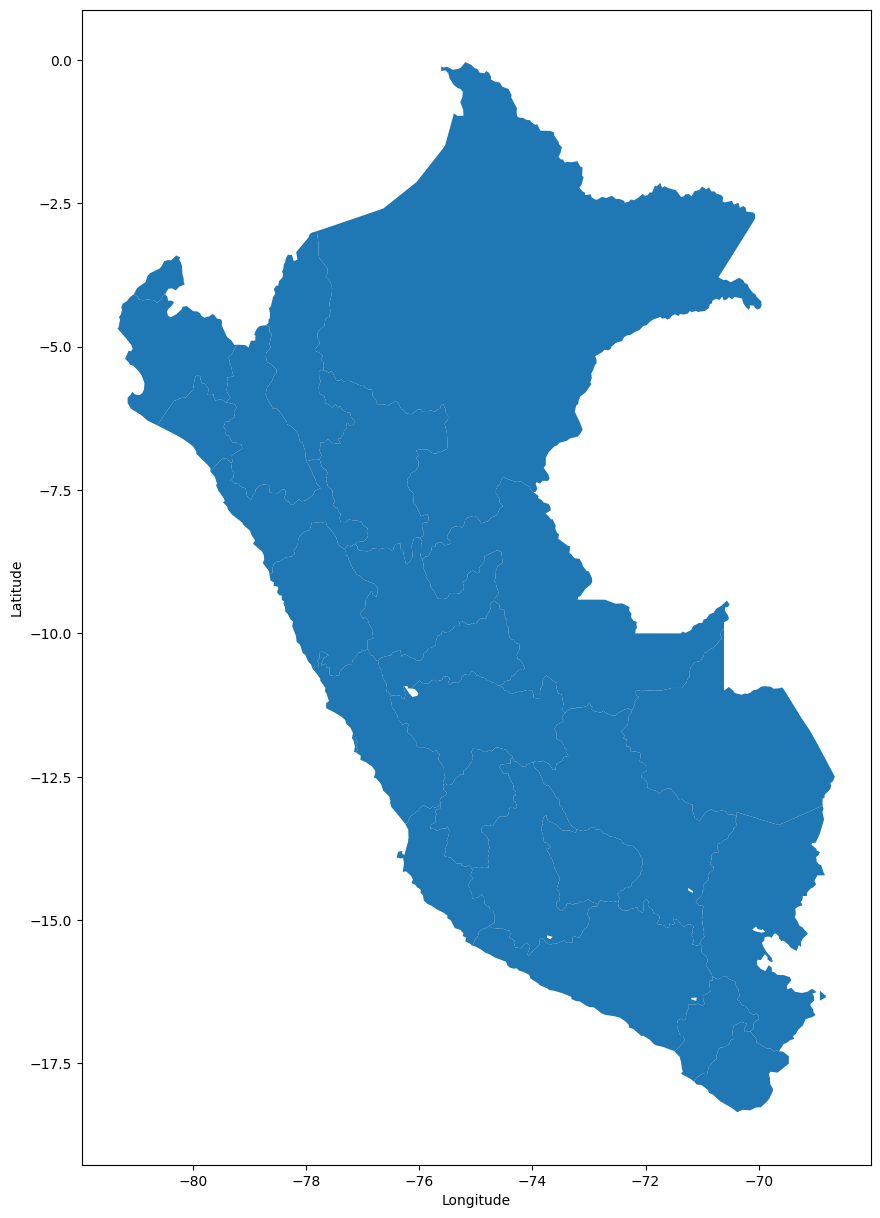

In [13]:
ax = region_geojson.plot(figsize=(15,15))
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()


In [14]:
# columnas esperadas
cat_col, reg_col, lat_col, lon_col = (
    'CATEGORÍA FINAL (con respuesta de UGEL)', 'Región', 'Latitud', 'Longitud'
)

# normalizador (minúsculas, sin acentos)
norm = lambda s: (
    ''.join(ch for ch in unicodedata.normalize('NFKD', str(s).strip().lower())
            if not unicodedata.combining(ch))
    if pd.notna(s) else ''
)

# resumen por región (total y "muy alta/o")
# Normaliza los nombres de región y categoría en el DataFrame principal
df = df.assign(
    _reg_norm=df[reg_col].map(norm),   # columna auxiliar: región normalizada (minúsculas, sin tildes)
    _cat_norm=df[cat_col].map(norm)    # columna auxiliar: categoría normalizada
)
# Esto se hace para evitar problemas de mayúsculas/minúsculas o tildes en los nombres al agrupar

# Calcula resumen por región:
# - total: cantidad de locales por región
# - muy_alta: cantidad de locales con categoría "Muy Alta" por región
# - prop_muy_alta: proporción de "Muy Alta" sobre el total de la región
resumen = (
    df.assign(muy=df['_cat_norm'].str.contains('muy alt', na=False))  # marca boolean para "muy alta"
      # assign crea una nueva columna 'muy' que es True si '_cat_norm' contiene 'muy alt'
      .groupby('_reg_norm')
      .agg(
          total=(reg_col, 'size'),
          muy_alta=('muy', 'sum')
        # Se usa 'size' en lugar de 'count' porque 'size' cuenta el número total de filas en el grupo, incluyendo los valores nulos en la columna agrupada.
        # En cambio, 'count' solo cuenta los valores NO nulos en la columna especificada.
        # Así, si hay valores nulos en la columna 'Región', 'size' igual los incluye en el total del grupo, mientras que 'count' los omitiría.
        # En este caso, queremos el total de locales por región (incluyendo posibles nulos), por eso se prefiere 'size'. muy_alta=('muy', 'sum')
      )
      .assign(prop_muy_alta=lambda d: d['muy_alta'] / d['total'])
      .reset_index()
      .rename(columns={'_reg_norm': 'reg_norm'})
)

# top regiones por número de "Muy Alta"
top = resumen.sort_values('muy_alta', ascending=False).head(10).reset_index(drop=True)
display(top)

,reg_norm,total,muy_alta,prop_muy_alta
0,ancash,7024,1232,0.175399
1,la libertad,8147,1146,0.140665
2,lima,30679,1012,0.032987
3,cajamarca,11624,819,0.070458
4,junin,7736,708,0.091520
5,loreto,6568,586,0.089220
6,piura,8260,582,0.070460
7,cusco,7744,560,0.072314
8,puno,8575,548,0.063907
9,ayacucho,4985,429,0.086058


In [15]:
region_geojson.head(3)

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.6614, -72.57725 -14.68..."


,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,_name_norm,reg_norm,total,muy_alta,prop_muy_alta
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...",amazonas,amazonas,3953,404,0.102201
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...",ancash,ancash,7024,1232,0.175399
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.6614, -72.57725 -14.68...",apurimac,apurimac,3500,171,0.048857


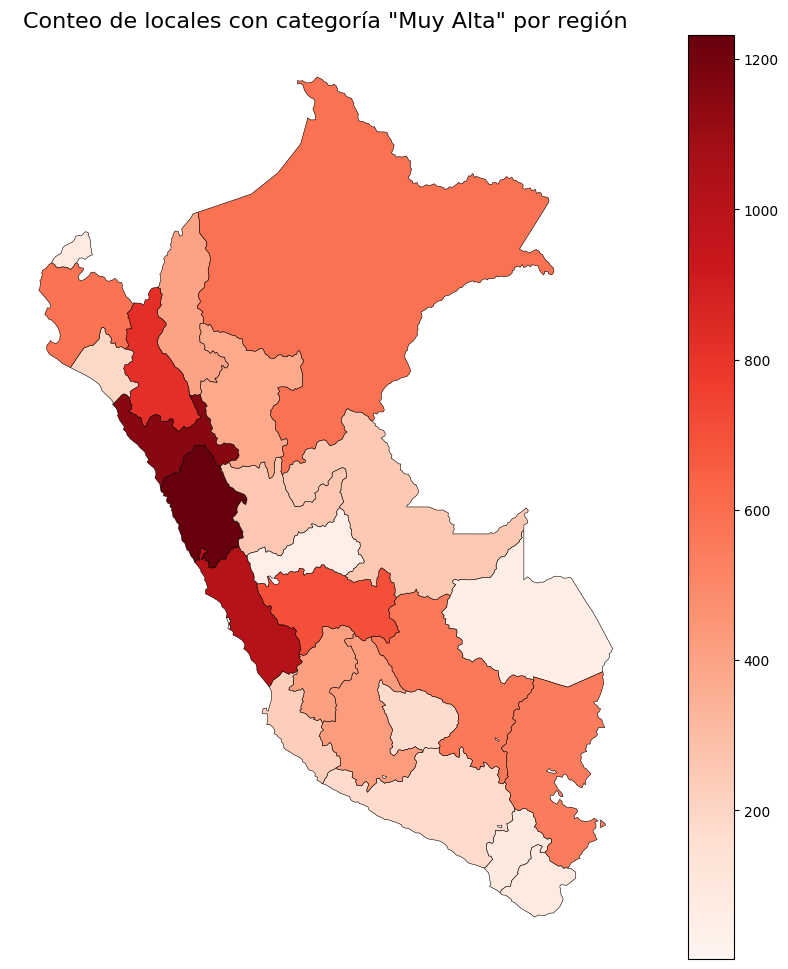

In [16]:
# crear columna normalizada con la función 'norm' definida antes
region_geojson['_name_norm'] = region_geojson["NOMBDEP"].astype(str).map(norm)

# unir resumen con geojson
#  - left_on: columna del GeoDataFrame (región normalizada)
#  - right_on: columna del DataFrame resumen (región normalizada)
#  - how='left': mantener todas las regiones del geojson, incluso si no tienen locales
#  - fillna: rellenar NaN en conteos con 0 (regiones sin locales)
merged = (region_geojson.merge(resumen, left_on='_name_norm', right_on='reg_norm', how='left')
                      .fillna({'muy_alta':0, 'prop_muy_alta':0}))

display(merged.head(3))

# mapa: conteo absoluto de "Muy Alta"
fig, ax = plt.subplots(figsize=(12,12))
merged.plot(column='muy_alta', cmap='Reds', legend=True, ax=ax, edgecolor='black', linewidth=0.4)
ax.set_title('Conteo de locales con categoría "Muy Alta" por región', fontsize=16)
ax.set_axis_off()
plt.show()

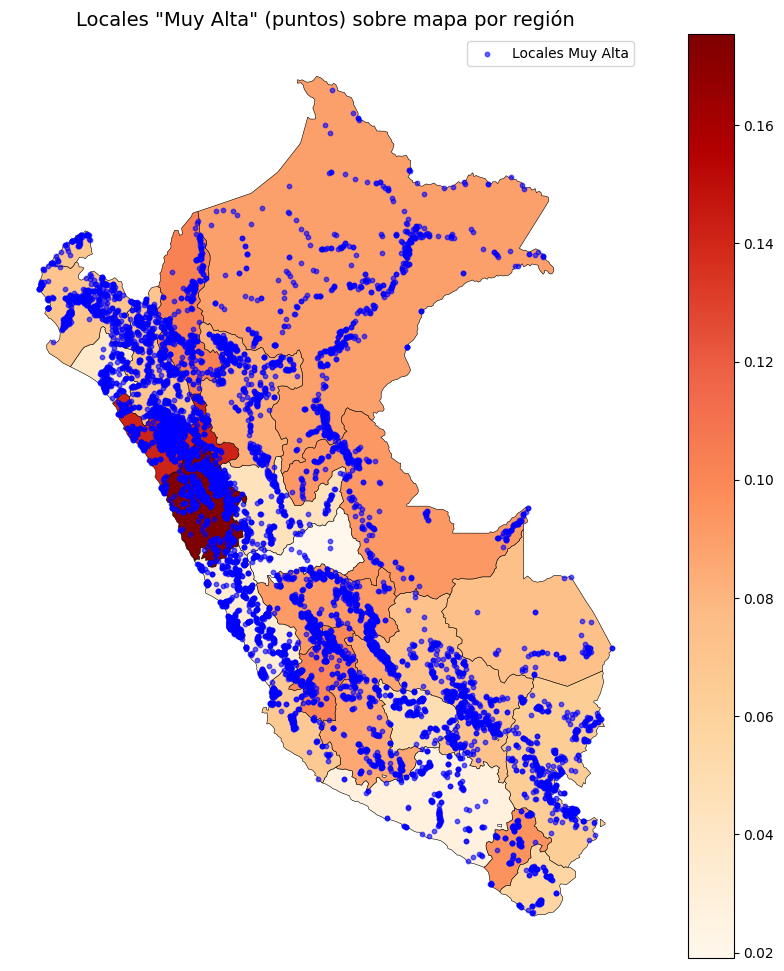

In [17]:
# overlay de puntos "Muy Alta" (si hay lat/lon válidas)
tmp = (df.loc[df['_cat_norm'].str.contains('muy alt', na=False), [lat_col, lon_col]]
         .apply(pd.to_numeric, errors='coerce').dropna())

# Filtrar puntos fuera de los límites del mapa (usando bounds del GeoDataFrame de regiones)
minx, miny, maxx, maxy = region_geojson.total_bounds
# buffer en grados (ajusta si es necesario); 0.5 grados ~= 50 km en latitud
# El siguiente filtro elimina puntos cuyas coordenadas están fuera de los límites del mapa de Perú.
# Se usan los límites (bounds) del GeoDataFrame de regiones, y se agrega un pequeño buffer (0.5 grados)
# para incluir puntos cercanos al borde. Así, solo se mantienen los puntos (locales "Muy Alta")
# que efectivamente caen dentro del área geográfica representada en el mapa.
buffer = 0.5
lon_min, lon_max = minx - buffer, maxx + buffer
lat_min, lat_max = miny - buffer, maxy + buffer
tmp = tmp[(tmp[lon_col] >= lon_min) & (tmp[lon_col] <= lon_max) &
          (tmp[lat_col] >= lat_min) & (tmp[lat_col] <= lat_max)]

gdf_pts = gpd.GeoDataFrame(tmp, geometry=gpd.points_from_xy(tmp[lon_col], tmp[lat_col]), crs='EPSG:4326')
fig, ax = plt.subplots(figsize=(12,12))
merged.plot(column='prop_muy_alta', cmap='OrRd', legend=True, ax=ax, edgecolor='black', linewidth=0.4)
gdf_pts.plot(ax=ax, color='blue', markersize=10, alpha=0.6, label='Locales Muy Alta')
ax.set_title('Locales "Muy Alta" (puntos) sobre mapa por región', fontsize=14)
ax.set_axis_off(); ax.legend(); 
plt.show()

## 3. Análisis descriptivo

- Gráfico: porcentaje de locales por `Tipo de Gestión` y `CATEGORÍA FINAL`.  
- Distribución del `% de aulas para sustituir` según `Región`.

**Preguntas:**  
> a) ¿Qué tipo de gestión concentra más locales “Muy Altos”?  
> b) ¿Qué región tiene mayor mediana de `% de aulas para sustituir`?

---

In [18]:
# Quitamos registros sin categoría final

copy = df[df["CATEGORÍA FINAL (con respuesta de UGEL)"] != "nan"][["CATEGORÍA FINAL (con respuesta de UGEL)", '% Aulas para sustituir - CIE  - BM -', 'Tipo de Gestión']]
copy.head(10)

,CATEGORÍA FINAL (con respuesta de UGEL),% Aulas para sustituir - CIE - BM -,Tipo de Gestión
0,3. Medio,nan,Pública de Gestión directa
1,3. Medio,13%,Pública de Gestión directa
2,3. Medio,60%,Pública de Gestión directa
4,3. Medio,nan,Pública de Gestión directa
5,3. Medio,nan,Pública de Gestión directa
7,3. Medio,20%,Pública de Gestión directa
8,2. Alto,nan,Pública de Gestión directa
9,3. Medio,nan,Pública de Gestión directa
10,2. Alto,7%,Pública de Gestión privada
11,3. Medio,33%,Pública de Gestión directa


In [19]:
# Gráfico: cantidad de locales por Tipo de Gestión y CATEGORÍA FINAL
tabla_tg_cat = (copy
    .groupby(['Tipo de Gestión','CATEGORÍA FINAL (con respuesta de UGEL)'])
    .size()
    .reset_index(name='n')
    .sort_values(['Tipo de Gestión','n'], ascending=[True,False])
)

# Agrega columna 'total' con el total por Tipo de Gestión
tabla_tg_cat['total'] = tabla_tg_cat.groupby('Tipo de Gestión')['n'].transform('sum')
# Calcula el porcentaje sobre el total de cada tipo de gestión
tabla_tg_cat['porcentaje'] = (tabla_tg_cat['n'] / tabla_tg_cat['total']) * 100
display(tabla_tg_cat.head(20))

,Tipo de Gestión,CATEGORÍA FINAL (con respuesta de UGEL),n,total,porcentaje
2,Privada,3. Medio,110,223,49.327354
1,Privada,2. Alto,80,223,35.874439
0,Privada,1. Muy Alto,20,223,8.968610
3,Privada,4. Bajo,13,223,5.829596
6,Pública de Gestión directa,3. Medio,31396,64750,48.488031
5,Pública de Gestión directa,2. Alto,20729,64750,32.013900
4,Pública de Gestión directa,1. Muy Alto,10482,64750,16.188417
7,Pública de Gestión directa,4. Bajo,2143,64750,3.309653
10,Pública de Gestión privada,3. Medio,445,790,56.329114
9,Pública de Gestión privada,2. Alto,242,790,30.632911


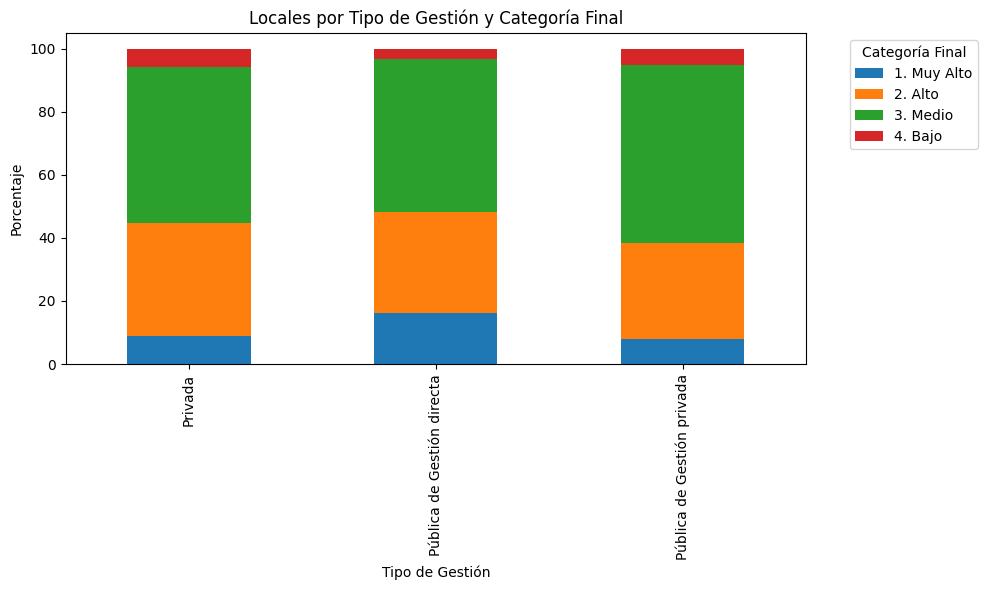

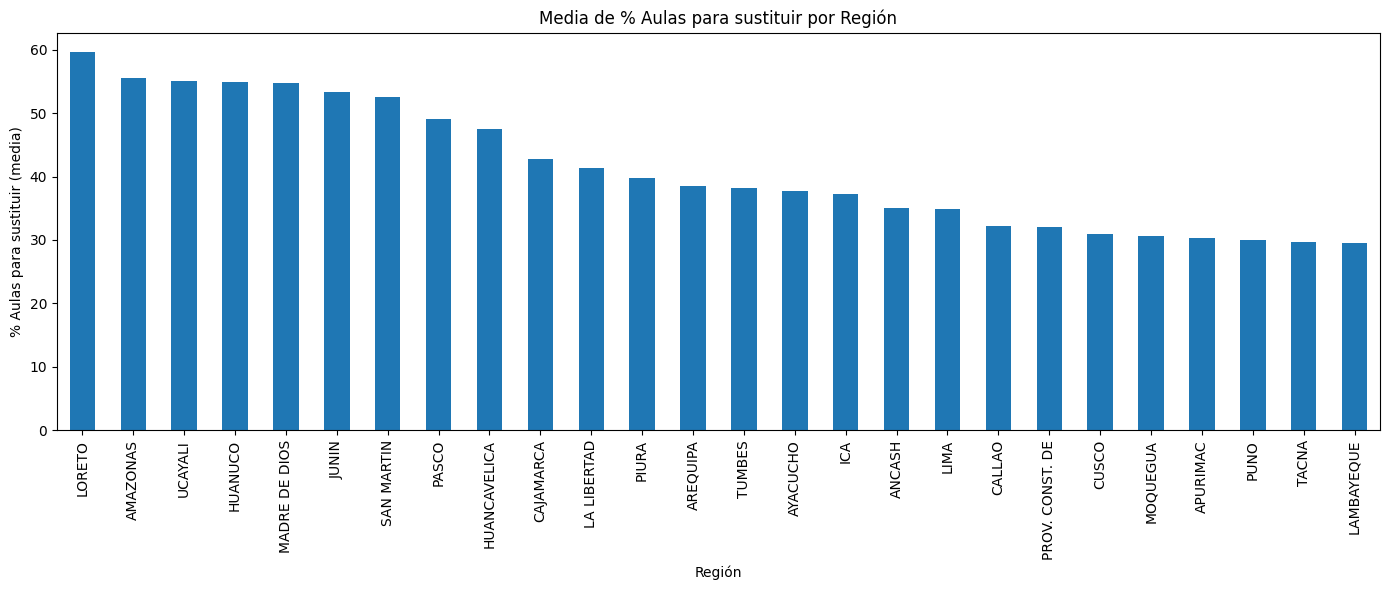

In [20]:
# (opcional) gráfico simple apilado por tipo de gestión
pivot_tg_cat = tabla_tg_cat.pivot(index='Tipo de Gestión',
                                columns='CATEGORÍA FINAL (con respuesta de UGEL)',
                                values='porcentaje').fillna(0)
pivot_tg_cat.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Locales por Tipo de Gestión y Categoría Final')
plt.ylabel('Porcentaje'); plt.xlabel('Tipo de Gestión')
plt.legend(title='Categoría Final', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout(); plt.show()


# Asegurarse de que la columna es numérica
df['% Aulas para sustituir - CIE  - BM -'] = (
    df['% Aulas para sustituir - CIE  - BM -']
    .astype(str).str.replace('%','', regex=False).str.replace(',','.', regex=False)
    .replace({'': np.nan, 'nan': np.nan})
    .astype(float)
)
mean_by_region = df.groupby('Región')['% Aulas para sustituir - CIE  - BM -'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
mean_by_region.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Media de % Aulas para sustituir por Región')
plt.ylabel('% Aulas para sustituir (media)')
plt.xlabel('Región')
plt.tight_layout()
plt.show()

## 4. Agrupación por región

- Agrupar por `Región` calculando:
  - Promedio de **riesgo de deslizamiento**, **inundación** e **infraestructura**.  
  - Porcentaje de locales “Altos” o “Muy Altos”.

**Preguntas:**  
> a) ¿Qué región presenta mayor riesgo promedio de deslizamiento?  
> b) ¿Qué porcentaje de locales “Altos/Muy Altos” hay en cada región?

---

In [21]:
df_new = df.copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151548 entries, 0 to 151547
Data columns (total 65 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   Código modular                                           151548 non-null  object 
 1   Anexo                                                    151548 non-null  object 
 2   Código de Local                                          151548 non-null  object 
 3   Cantidad de IIEE que comparten el mismo local escolar    151548 non-null  object 
 4   Nombre del Centro Educativo                              151548 non-null  object 
 5   Código modalidad                                         151548 non-null  object 
 6   Modalidad                                                151548 non-null  object 
 7   Forma                                                    151548 non-null  object 
 8   Característica

In [22]:
df_new[['Infraestructura: Nivel I (muy mala) - CIE -',
          'Infraestructura: Nivel II (mala) - CIE -',
          'Infraestructura: Nivel III (regular o buena) - CIE -']]

,Infraestructura: Nivel I (muy mala) - CIE -,Infraestructura: Nivel II (mala) - CIE -,Infraestructura: Nivel III (regular o buena) - CIE -
0,0,0,1
1,0,1,0
2,1,0,0
3,nan,nan,nan
4,0,1,0
...,...,...,...
151543,nan,nan,nan
151544,nan,nan,nan
151545,nan,nan,nan
151546,nan,nan,nan


In [23]:
# Infraestructura I/II/III suelen ser Sí/No → 1/0
for n in ['Infraestructura: Nivel I (muy mala) - CIE -',
          'Infraestructura: Nivel II (mala) - CIE -',
          'Infraestructura: Nivel III (regular o buena) - CIE -']:
    df_new[n] = (df_new[n]
                    .apply(pd.to_numeric, errors='coerce'))

# Promedios por Región
agg_cols = ['Riesgo de Deslizamiento (5 muy alto) - INGEMMET -',
    'Inundación 1:100,000 (5 Muy alta) - INGEMMET -', 
    'Infraestructura: Nivel I (muy mala) - CIE -',
    'Infraestructura: Nivel I (muy mala) - CIE -',
    'Infraestructura: Nivel II (mala) - CIE -',
    'Infraestructura: Nivel III (regular o buena) - CIE -']

agg_region_prom = (df_new
    .groupby('Región')[agg_cols]
    .mean(numeric_only=True)
    .round(2)
)
display(agg_region_prom.head(10))

# % locales "Alto/Muy Alto" por Región
mask_altos = df_new['CATEGORÍA FINAL (con respuesta de UGEL)'].astype(str).str.upper().isin(['2. ALTO','1. MUY ALTO'])
resumen_altos = (df_new.assign(alto_muy_alto=mask_altos)
   .groupby('Región')
   .agg(n_locales=('alto_muy_alto','size'),
        n_alto_muy_alto=('alto_muy_alto','sum'))
   .assign(pct_alto_muy_alto=lambda d: (d['n_alto_muy_alto']/d['n_locales']*100).round(2))
   .sort_values('pct_alto_muy_alto', ascending=False)
)
display(resumen_altos.head(10))


,Infraestructura: Nivel I (muy mala) - CIE -,Infraestructura: Nivel I (muy mala) - CIE -,Infraestructura: Nivel II (mala) - CIE -,Infraestructura: Nivel III (regular o buena) - CIE -
Región,,,,
AMAZONAS,0.49,0.49,0.21,0.24
ANCASH,0.20,0.20,0.48,0.26
APURIMAC,0.23,0.23,0.60,0.14
AREQUIPA,0.25,0.25,0.32,0.30
AYACUCHO,0.24,0.24,0.52,0.18
CAJAMARCA,0.46,0.46,0.28,0.20
CALLAO,0.06,0.06,0.65,0.29
CUSCO,0.17,0.17,0.58,0.20
HUANCAVELICA,0.37,0.37,0.32,0.23


,n_locales,n_alto_muy_alto,pct_alto_muy_alto
Región,,,
SAN MARTIN,4589,1538,33.51
ANCASH,7024,2315,32.96
LA LIBERTAD,8147,2609,32.02
HUANCAVELICA,4137,1235,29.85
AYACUCHO,4985,1480,29.69
JUNIN,7736,2264,29.27
AMAZONAS,3953,1113,28.16
PUNO,8575,2328,27.15
CUSCO,7744,2024,26.14


## 5. Correlaciones

- Calcular y graficar la **correlación** entre:
  - `% Aulas para sustituir`,  
  - `Riesgo de Deslizamiento`,  
  - `Infraestructura Nivel I/II/III`,  
  - `CATEGORÍA FINAL (ordinal)`.

**Pregunta:**  
> ¿Qué variable tiene la mayor correlación con la categoría final de vulnerabilidad?


In [24]:
# Preparar numéricas
cand = ['Riesgo de Deslizamiento (5 muy alto) - INGEMMET -',
            'Inundación 1:100,000 (5 Muy alta) - INGEMMET -',
            '% Aulas para sustituir - CIE  - BM -', 
            'Infraestructura: Nivel I (muy mala) - CIE -',
            'Infraestructura: Nivel II (mala) - CIE -',
            'Infraestructura: Nivel III (regular o buena) - CIE -']

# Convertir 'CATEGORÍA FINAL (con respuesta de UGEL)' a ordinal numérico si existe y no está ya en cand
ord_map = {'5. MUY BAJO': 1, '4. BAJO': 2, '3. MEDIO': 3, '2. ALTO': 4, '1. MUY ALTO': 5}
cat_col = 'CATEGORÍA FINAL (con respuesta de UGEL)'
df_new['cat_final_ord'] = df_new[cat_col].astype(str).str.upper().replace(ord_map)
cand.append('cat_final_ord')

df_new[cand]

,Riesgo de Deslizamiento (5 muy alto) - INGEMMET -,"Inundación 1:100,000 (5 Muy alta) - INGEMMET -",% Aulas para sustituir - CIE - BM -,Infraestructura: Nivel I (muy mala) - CIE -,Infraestructura: Nivel II (mala) - CIE -,Infraestructura: Nivel III (regular o buena) - CIE -,cat_final_ord
0,3,4,NaN,0.0,0.0,1.0,3
1,3,4,13.0,0.0,1.0,0.0,3
2,3,4,60.0,1.0,0.0,0.0,3
3,nan,nan,NaN,NaN,NaN,NaN,NAN
4,3,2,NaN,0.0,1.0,0.0,3
...,...,...,...,...,...,...,...
151543,nan,nan,NaN,NaN,NaN,NaN,NAN
151544,nan,nan,NaN,NaN,NaN,NaN,NAN
151545,nan,nan,NaN,NaN,NaN,NaN,NAN
151546,nan,nan,NaN,NaN,NaN,NaN,NAN


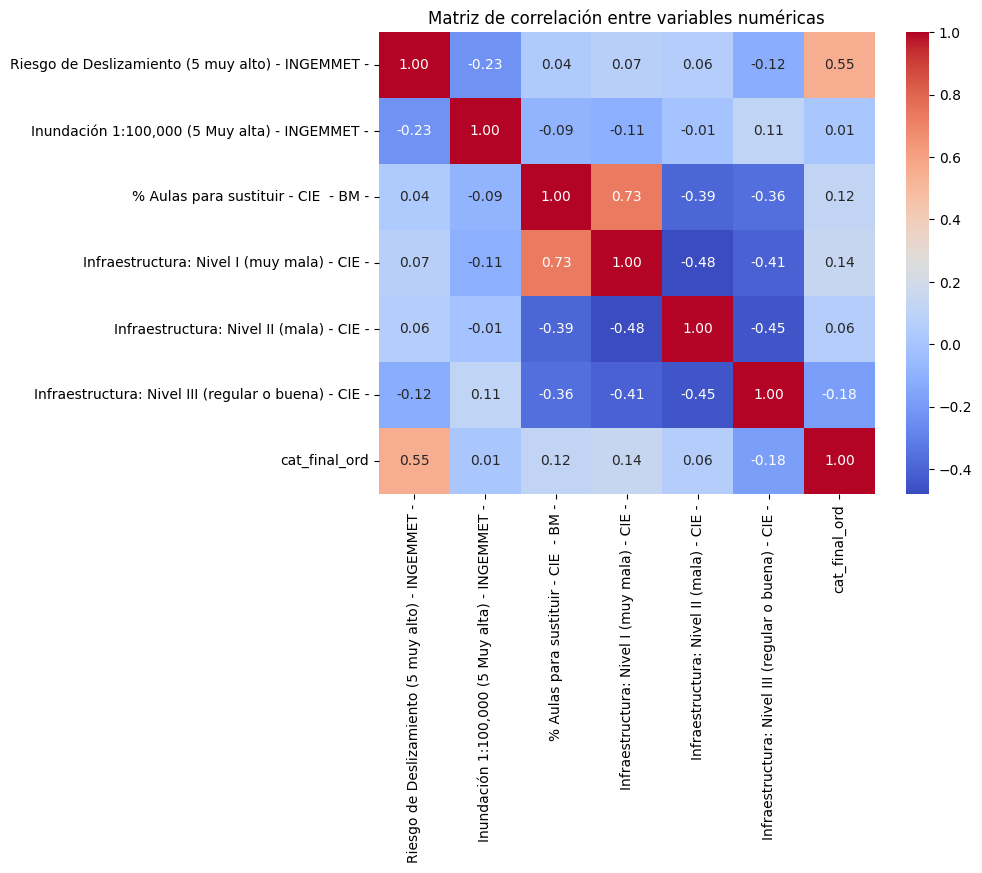

In [25]:
num = df_new[cand].copy()
corr = num.corr().round(2)

# Gráfico de calor de la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()
